Github link: https://github.com/genom10/Sensors2023/tree/master/HW6

# Task 5.1

## Camera calibration



In [3]:
!unzip data.zip

Archive:  data.zip
caution: filename not matched:  -None


In [42]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt

In [50]:
square_size = 35
img_mask = "./data/right_chessboard/*.jpg"
pattern_size = (5, 7)
shape = (1280, 720)

figsize = (20, 20)

In [51]:
img_names = glob(img_mask)
num_images = len(img_names)

pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size
obj_points = []
img_points = []
h, w = shape

## Step 1: find all corners in calibration plane


processing ./data/right_chessboard/1.jpg... 


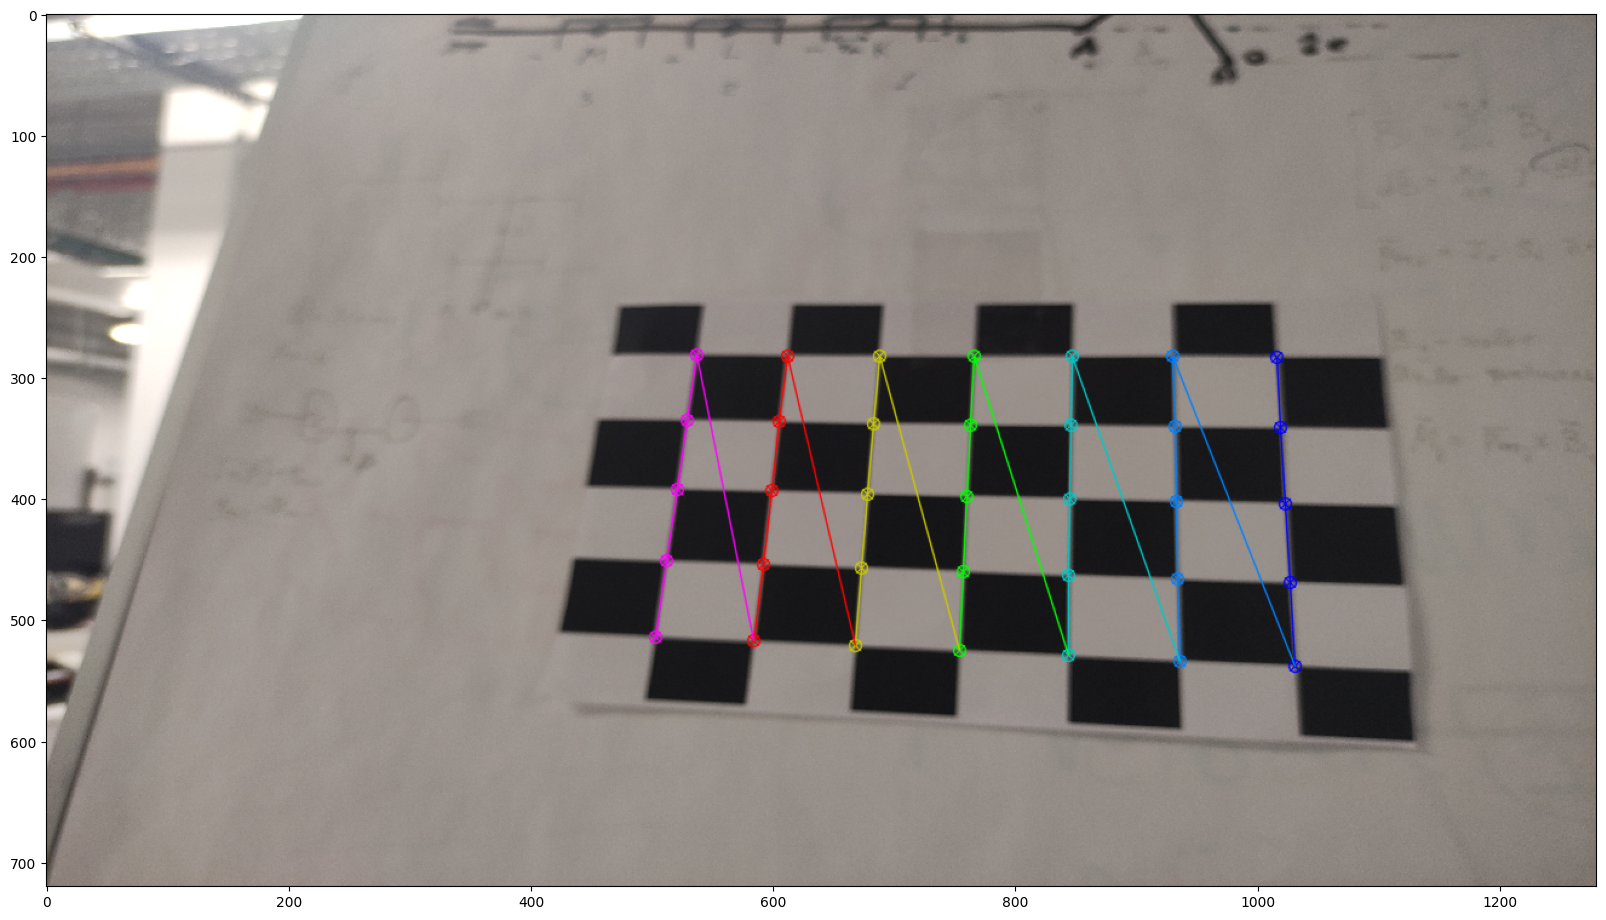

./data/right_chessboard/1.jpg... OK
[[1015.8188  282.7268]]
[[1015.8188  282.7268]]
processing ./data/right_chessboard/5.jpg... 
chessboard not found
processing ./data/right_chessboard/2.jpg... 


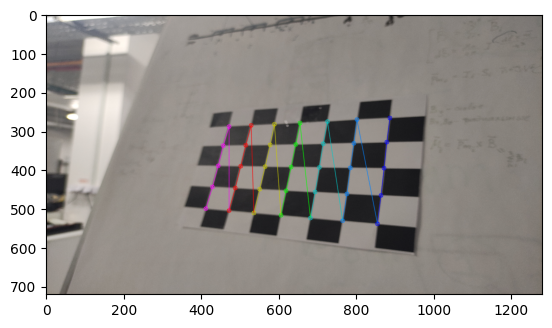

./data/right_chessboard/2.jpg... OK
[[886.77185 267.09042]]
[[886.77185 267.09042]]
processing ./data/right_chessboard/4.jpg... 


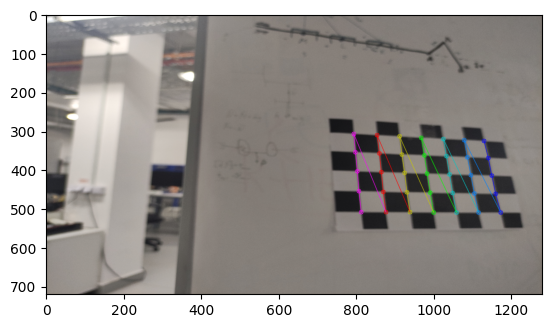

./data/right_chessboard/4.jpg... OK
[[1130.045    326.41425]]
[[1130.045    326.41425]]
processing ./data/right_chessboard/11.jpg... 


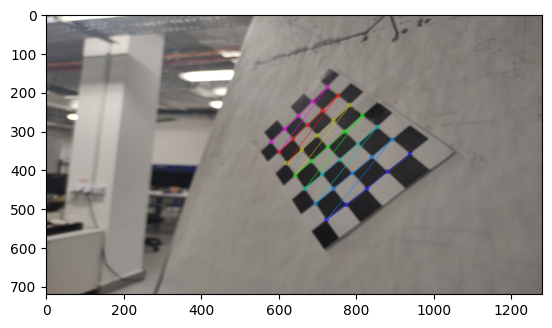

./data/right_chessboard/11.jpg... OK
[[938.8247  359.03082]]
[[938.8247  359.03082]]
processing ./data/right_chessboard/8.jpg... 


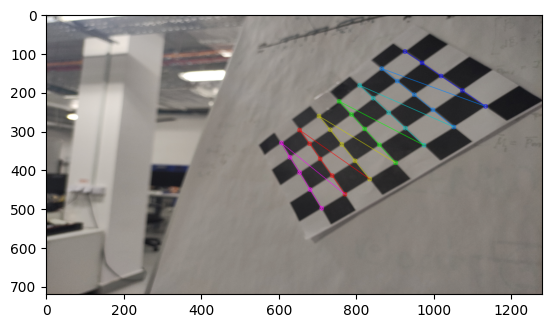

./data/right_chessboard/8.jpg... OK
[[926.34937  96.14088]]
[[926.34937  96.14088]]
processing ./data/right_chessboard/6.jpg... 
chessboard not found
processing ./data/right_chessboard/3.jpg... 


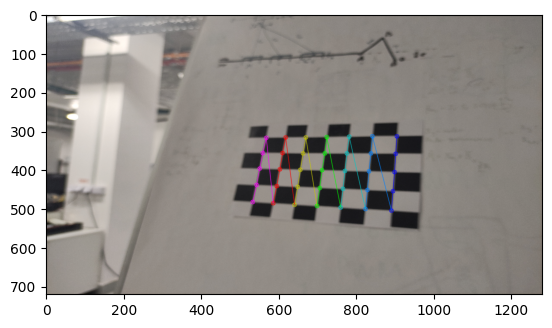

./data/right_chessboard/3.jpg... OK
[[905.2174  313.53094]]
[[905.2174  313.53094]]
processing ./data/right_chessboard/9.jpg... 


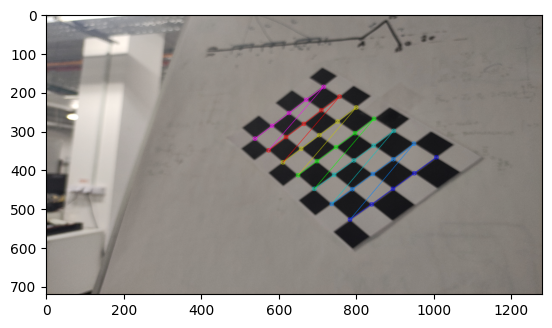

./data/right_chessboard/9.jpg... OK
[[1006.96783  368.26196]]
[[1006.96783  368.26196]]
processing ./data/right_chessboard/10.jpg... 


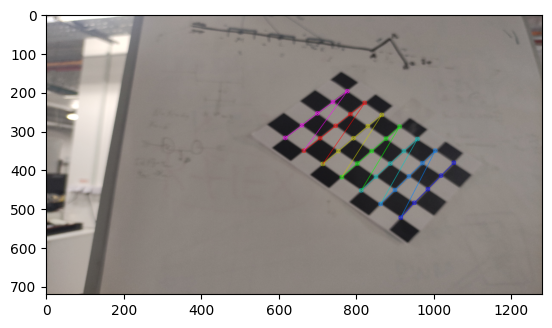

./data/right_chessboard/10.jpg... OK
[[1051.5345   382.34763]]
[[1051.5345   382.34763]]
processing ./data/right_chessboard/7.jpg... 


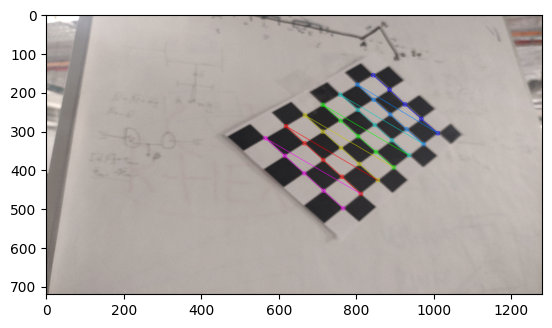

./data/right_chessboard/7.jpg... OK
[[844.3456  156.75623]]
[[844.3456  156.75623]]


In [52]:
plt.figure(figsize=figsize)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

for i, fn in enumerate(img_names):
    print("processing %s... " % fn)
    imgBGR = cv2.imread(fn)

    if imgBGR is None:
        print("Failed to load", fn)
        continue
    
    downsized = cv2.resize(imgBGR, shape)

    imgRGB = cv2.cvtColor(downsized, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

    # Finds the positions of internal corners of the chessboard.
    # image	Source chessboard view. It must be an 8-bit grayscale or color image.
    # patternSize	Number of inner corners per a chessboard row and column.
    # corners	Output array of detected corners.

    found, corners = cv2.findChessboardCorners(img, pattern_size)

    if not found:
        print("chessboard not found")
        continue
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(img, corners, (10,10),(-1,-1), criteria)
      

    # Draw and display the corners  

    img_w_corners = cv2.drawChessboardCorners(imgRGB, pattern_size, corners2, found)
    plt.plot()
    plt.imshow(img_w_corners)
    plt.show()

    print(f"{fn}... OK")
    print(corners2[0])
    # for i in range(corners2.shape[0]):
    #     corners2[i,0,0] = corners2[i,0,0] * imgBGR.shape[0] / img.shape[0]
    #     corners2[i,0,1] = corners2[i,0,1] * imgBGR.shape[1] / img.shape[1]
    print(corners2[0])
    img_points.append(corners2)
    obj_points.append(pattern_points)

## Step 2: get camera intrinsics + distortion coeffs
also get extrinsic rotation and translation vectors per image. Rotation vector is another representation for a full R matrix
more on it here: https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula


In [53]:
# calculate camera distortion
rms, camera_matrix, dist_coefs, _rvecs, _tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())


RMS: 0.660035930067325
camera matrix:
 [[1.02821635e+03 0.00000000e+00 6.05755662e+02]
 [0.00000000e+00 7.75007495e+02 3.26860107e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [ 0.09412464 -0.19052752 -0.0148062  -0.01172932  0.2278439 ]


In [54]:
mean_error = 0
for i in range(len(obj_points)):
    imgpoints2 = cv2.projectPoints(obj_points[i],  _rvecs[i], _tvecs[i], camera_matrix, dist_coefs)[0]
    error = cv2.norm(img_points[i].reshape(-1,1,2), imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error


print( "total error: {}".format(mean_error/len(obj_points)) )

total error: 0.10147764545606298


## Build undistorted images


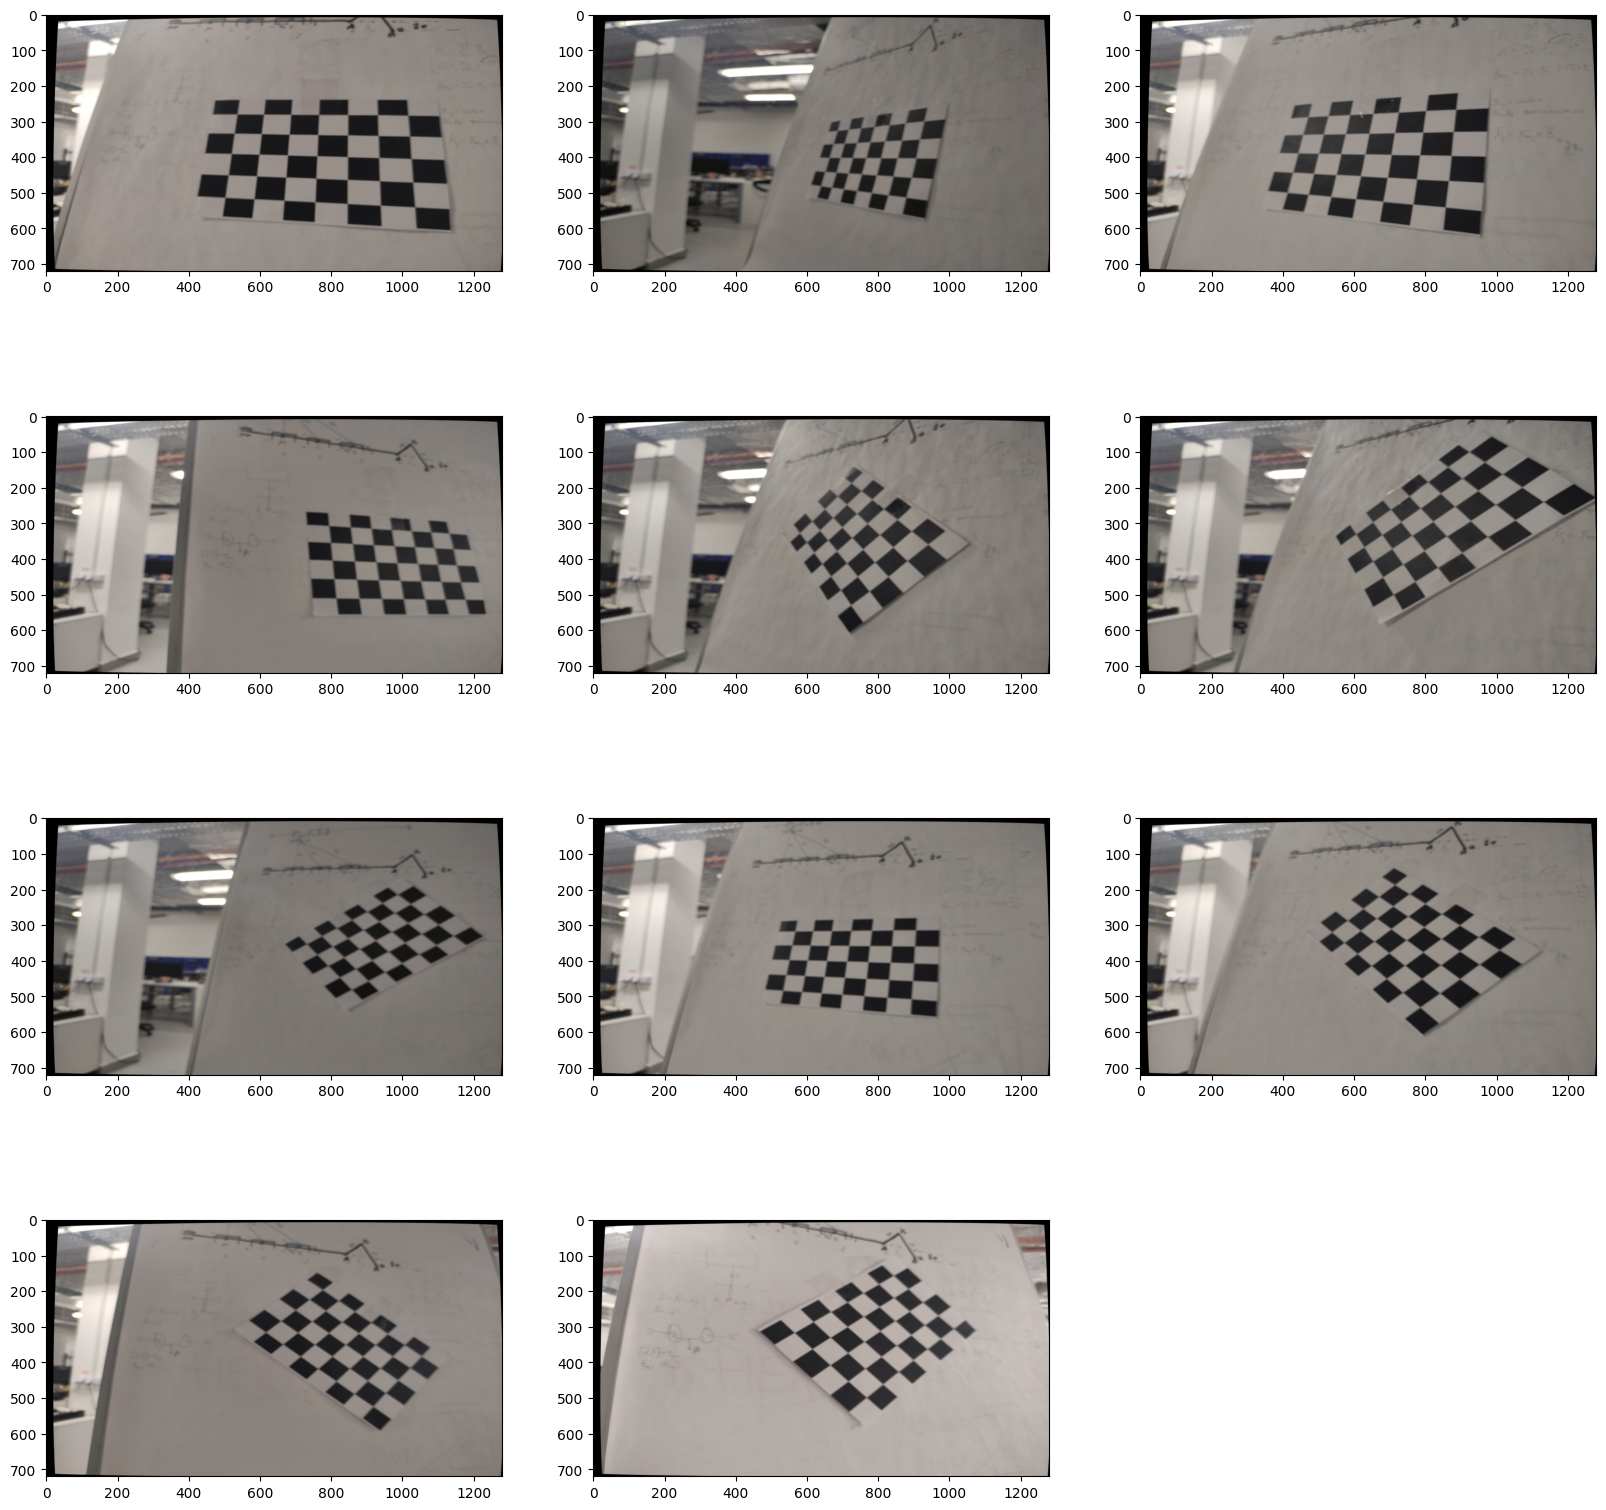

Done


In [55]:
# undistort the image with the calibration
plt.figure(figsize=figsize)
for i, fn in enumerate(img_names):

    imgBGR = cv2.imread(fn)
    downsized = cv2.resize(imgBGR, shape)
    imgRGB = cv2.cvtColor(downsized, cv2.COLOR_BGR2RGB)

    dst = cv2.undistort(imgRGB, camera_matrix, dist_coefs)

    if i < 12:
        plt.subplot(4, 3, i + 1)
        plt.imshow(dst)

plt.show()
print("Done")



## Example for full projection from 3D to 2D of a cube


/tmp/ipykernel_8817/3266704042.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  objectPoints =(3*square_size* np.array([[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0], [0, 0, -1], [0, 1, -1], [1, 1, -1], [1, 0, -1]], dtype=np.float))


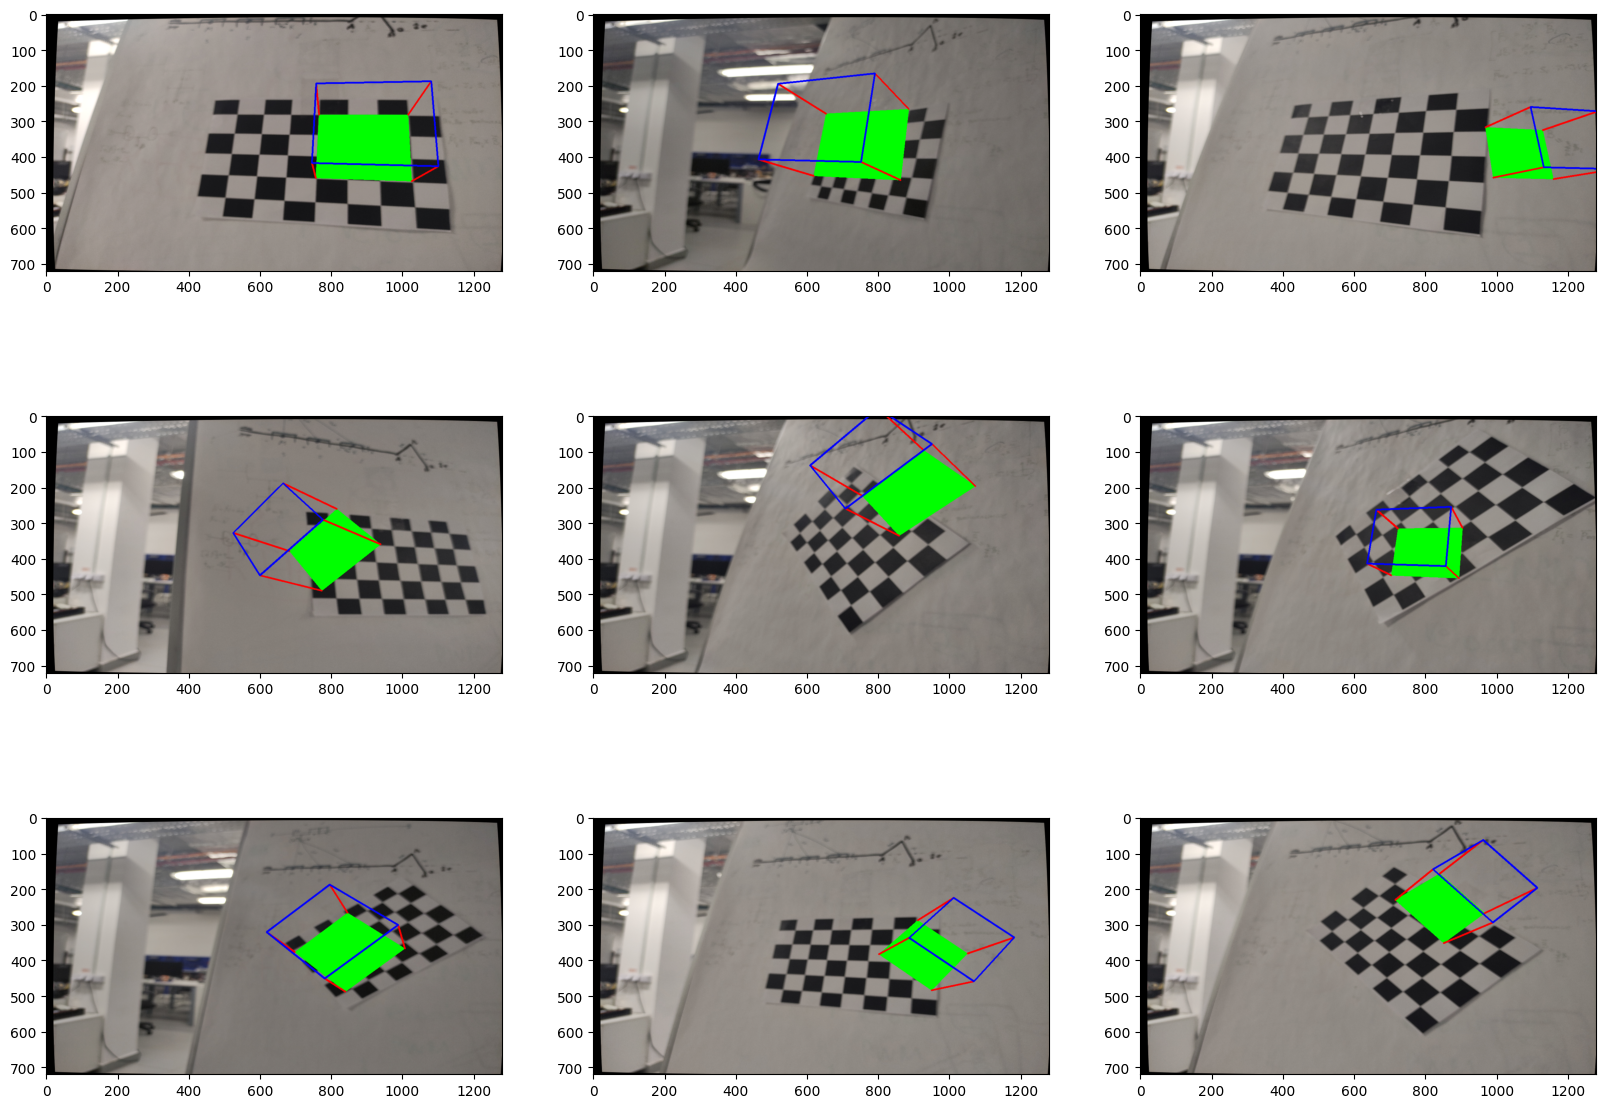

In [56]:
objectPoints =(3*square_size* np.array([[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0], [0, 0, -1], [0, 1, -1], [1, 1, -1], [1, 0, -1]], dtype=np.float))


def draw(img, imgpts):
    imgpts = np.int32(imgpts).reshape(-1, 2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]], -1, (0, 255, 0), -1)

    # draw pillars in blue color
    for i, j in zip(range(4), range(4, 8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]), (255), 3)

    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]], -1, (0, 0, 255), 3)

    return img


plt.figure(figsize=figsize)
for i in range(min(len(img_names),len(_rvecs))):

    imgBGR = cv2.imread(img_names[i])
    downsized = cv2.resize(imgBGR, shape)
    imgRGB = cv2.cvtColor(downsized, cv2.COLOR_BGR2RGB)

    dst = cv2.undistort(imgRGB, camera_matrix, dist_coefs)
    imgpts = cv2.projectPoints(objectPoints, _rvecs[i], _tvecs[i], camera_matrix, dist_coefs)[0]
    drawn_image = draw(dst, imgpts)

    if i < 12:
        plt.subplot(4, 3, i + 1)
        plt.imshow(drawn_image)

plt.show()
